In [1]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add ,Flatten ,Dense,GlobalAveragePooling2D,Conv2D
from tensorflow.keras.applications.vgg16  import VGG16
from keras.models import load_model
from tensorflow.keras.models import Model

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


In [2]:
#read covid-19
CovidPath="../input/sarscov2-ctscan-dataset/COVID"
CovidCT=os.listdir(CovidPath)
#read normal
NonCovidPath="../input/sarscov2-ctscan-dataset/non-COVID"
NonCovidCT=os.listdir(NonCovidPath)
#show
CovidCT,NonCovidCT

(['Covid (230).png',
  'Covid (1195).png',
  'Covid (182).png',
  'Covid (817).png',
  'Covid (631).png',
  'Covid (369).png',
  'Covid (777).png',
  'Covid (1249).png',
  'Covid (366).png',
  'Covid (1139).png',
  'Covid (152).png',
  'Covid (179).png',
  'Covid (1004).png',
  'Covid (297).png',
  'Covid (1219).png',
  'Covid (556).png',
  'Covid (776).png',
  'Covid (545).png',
  'Covid (137).png',
  'Covid (799).png',
  'Covid (504).png',
  'Covid (168).png',
  'Covid (472).png',
  'Covid (1233).png',
  'Covid (347).png',
  'Covid (1161).png',
  'Covid (979).png',
  'Covid (274).png',
  'Covid (83).png',
  'Covid (384).png',
  'Covid (53).png',
  'Covid (701).png',
  'Covid (1214).png',
  'Covid (806).png',
  'Covid (959).png',
  'Covid (276).png',
  'Covid (431).png',
  'Covid (356).png',
  'Covid (95).png',
  'Covid (1075).png',
  'Covid (517).png',
  'Covid (924).png',
  'Covid (813).png',
  'Covid (116).png',
  'Covid (351).png',
  'Covid (1208).png',
  'Covid (208).png',
  'Cov

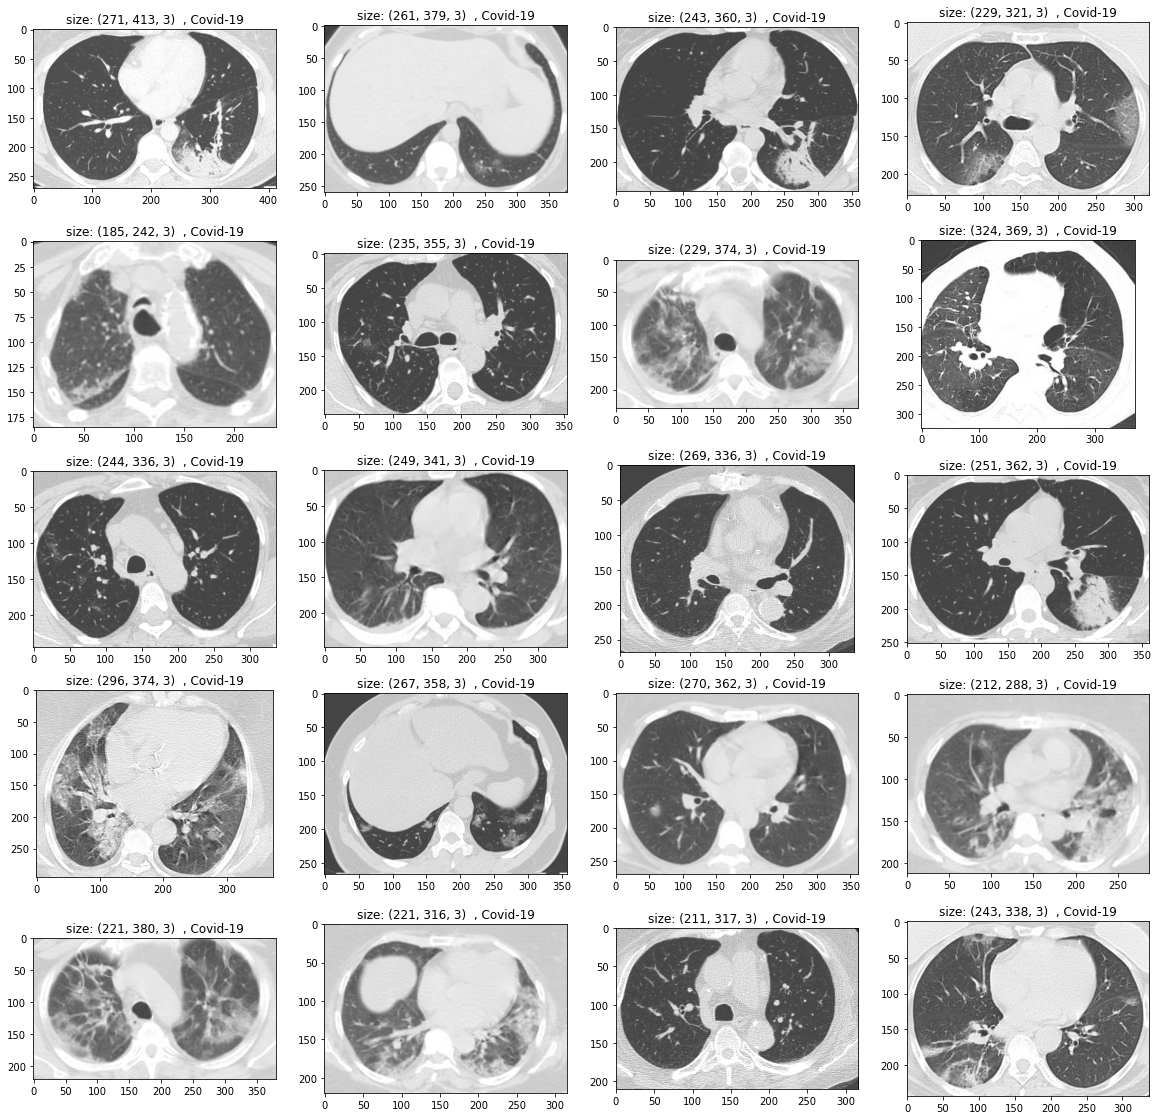

In [3]:
#Visualization for Covid 19 in DB1
plt.figure(figsize=(20,20))
for covid19 in CovidCT[:20]:
    plt.subplot(5,4,CovidCT.index(covid19)+1)
    image=cv2.imread(os.path.join(CovidPath,covid19))
    plt.imshow(image)
    title=f"size: {image.shape} "  + " , Covid-19"
    plt.title(title)
plt.show()

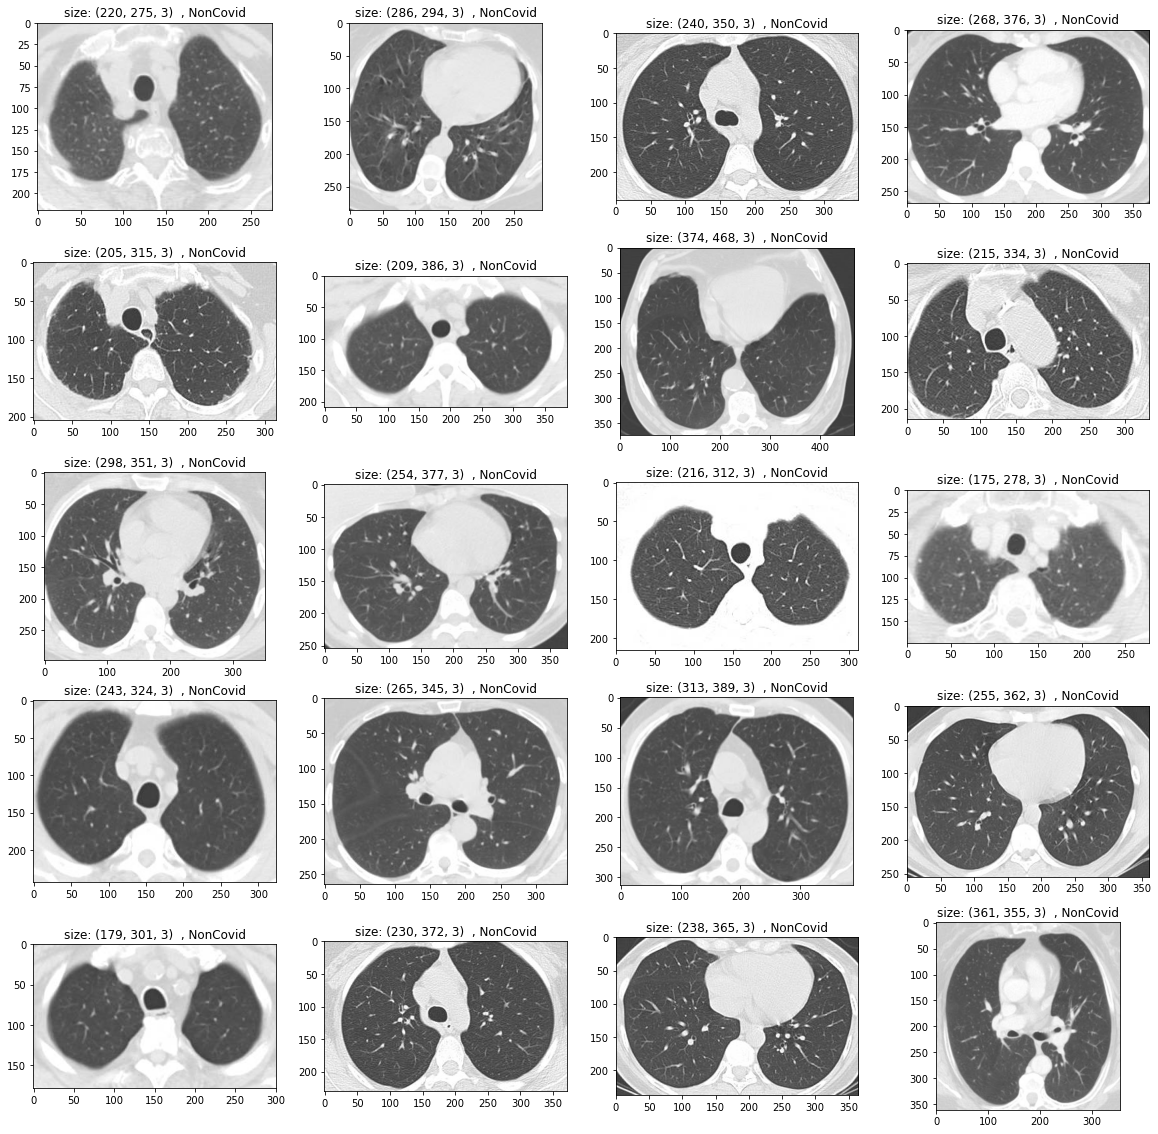

In [4]:
#Visualization for NonCovid in DB1
plt.figure(figsize=(20,20))
for covid19 in NonCovidCT[:20]:
    plt.subplot(5,4,NonCovidCT.index(covid19)+1)
    image=cv2.imread(os.path.join(NonCovidPath,covid19))
    plt.imshow(image)
    title=f"size: {image.shape} "  + " , NonCovid"
    plt.title(title)
plt.show()

In [5]:
folders=os.listdir("../input/sarscov2-ctscan-dataset")
folders

['non-COVID', 'COVID']

In [6]:
#read covid-19
CovidPath="../input/sarscov2-ctscan-dataset/COVID"
CovidCT=os.listdir(CovidPath)
#read normal
NonCovidPath="../input/sarscov2-ctscan-dataset/non-COVID"
NonCovidCT=os.listdir(NonCovidPath)
#show
CovidCT,NonCovidCT

(['Covid (230).png',
  'Covid (1195).png',
  'Covid (182).png',
  'Covid (817).png',
  'Covid (631).png',
  'Covid (369).png',
  'Covid (777).png',
  'Covid (1249).png',
  'Covid (366).png',
  'Covid (1139).png',
  'Covid (152).png',
  'Covid (179).png',
  'Covid (1004).png',
  'Covid (297).png',
  'Covid (1219).png',
  'Covid (556).png',
  'Covid (776).png',
  'Covid (545).png',
  'Covid (137).png',
  'Covid (799).png',
  'Covid (504).png',
  'Covid (168).png',
  'Covid (472).png',
  'Covid (1233).png',
  'Covid (347).png',
  'Covid (1161).png',
  'Covid (979).png',
  'Covid (274).png',
  'Covid (83).png',
  'Covid (384).png',
  'Covid (53).png',
  'Covid (701).png',
  'Covid (1214).png',
  'Covid (806).png',
  'Covid (959).png',
  'Covid (276).png',
  'Covid (431).png',
  'Covid (356).png',
  'Covid (95).png',
  'Covid (1075).png',
  'Covid (517).png',
  'Covid (924).png',
  'Covid (813).png',
  'Covid (116).png',
  'Covid (351).png',
  'Covid (1208).png',
  'Covid (208).png',
  'Cov

In [7]:
#Set the all image in the same image size
ImageSize=224

Covid19CT=[]
Covid19Labels=[]


NonCovid19CT=[]
nonCovid19Labels=[]
for folder in folders:
    
    if folder=="COVID":

        for image in CovidCT:
            Slice=cv2.resize(cv2.imread(os.path.join(CovidPath,image)),(ImageSize,ImageSize))
            Covid19CT.append(Slice)
            Covid19Labels.append("COVID19")
    else:


        for image in NonCovidCT:
            Slice=cv2.resize(cv2.imread(os.path.join(NonCovidPath,image)),(ImageSize,ImageSize))
            NonCovid19CT.append(Slice)
            nonCovid19Labels.append("NonCovid19")
        
        

       
        
    


In [8]:
len(Covid19CT),len(Covid19Labels),len(NonCovid19CT),len(nonCovid19Labels)

(1252, 1252, 1229, 1229)

In [9]:
    
print("\t covid-19  sample : \n\n" ,Covid19CT[:20] )
print("\t covid-19  Labels : \n\n" ,Covid19Labels[:20] )

print(" \t normal sample : \n\n" ,NonCovid19CT[:20] )
print(" \t normal Labels : \n\n" ,nonCovid19Labels[:20] )

	 covid-19  sample : 

 [array([[[212, 212, 212],
        [215, 215, 215],
        [218, 218, 218],
        ...,
        [198, 198, 198],
        [204, 204, 204],
        [210, 210, 210]],

       [[211, 211, 211],
        [208, 208, 208],
        [207, 207, 207],
        ...,
        [212, 212, 212],
        [202, 202, 202],
        [211, 211, 211]],

       [[208, 208, 208],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [205, 205, 205],
        [203, 203, 203],
        [207, 207, 207]],

       ...,

       [[ 90,  90,  90],
        [112, 112, 112],
        [150, 150, 150],
        ...,
        [172, 172, 172],
        [168, 168, 168],
        [163, 163, 163]],

       [[ 87,  87,  87],
        [107, 107, 107],
        [159, 159, 159],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 87,  87,  87],
        [ 81,  81,  81],
        [ 87,  87,  87],
        ...,
        [255, 255, 255],
        [255, 255, 255],

In [10]:
CTData=[]
CTlabels=[]

##CT
#Add covid
CTData.extend(Covid19CT)
#Add non covid
CTData.extend(NonCovid19CT)

##Labels
#Add covid
CTlabels.extend(Covid19Labels)
#Add non covid
CTlabels.extend(nonCovid19Labels)




In [11]:
#Convert data to array

CTData=np.array(CTData)
CTlabels=np.array(CTlabels)
print(CTData.shape,CTlabels.shape )


(2481, 224, 224, 3) (2481,)


In [12]:
Classes={0:"COVID19",1:"NonCovid19"}

def Getclass(ind):
    return Classes[ind]

def Getcode(name):
    for key , val in Classes.items():
        if name==val:
            return key
    
    
print(Getclass(0))
print(Getclass(1),"\n\n")
#------------
print(Getcode("COVID19"))
print(Getcode("NonCovid19"))

COVID19
NonCovid19 


0
1


In [13]:
#Convert Labels name to numbers , Such as covid19 = 0 , Noncovid = 1
Labels=np.array([Getcode(i) for i in CTlabels])
print("Labels",Labels)
print("Labels shape",Labels.shape)

Labels [0 0 0 ... 1 1 1]
Labels shape (2481,)


In [14]:
Xtrain,Xval, Ytrain,  Yval =train_test_split(CTData,Labels,test_size=0.05 , random_state=42)

In [15]:
Xtrain.shape,Xval.shape, Ytrain.shape,  Yval.shape

((2356, 224, 224, 3), (125, 224, 224, 3), (2356,), (125,))

In [16]:
Xval=Xval/255

X-Rays batch shape: (20, 224, 224, 3)
Labels batch shape: (20,)


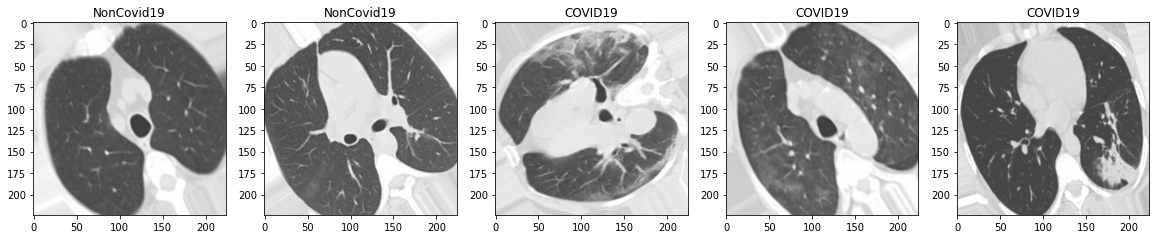

In [17]:
#Rescale and preperate Datagen to generate more Xrays
Datagen=ImageDataGenerator( rescale=1/255,     
#                             samplewise_center=True,
#                           samplewise_std_normalization= True,   
                        rotation_range=360, # Degree range for random rotations
                       
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True
                          ) # Randomly flip inputs vertically
#Generate Alot of Xrays
BatchSize=20

#Generate Xrays for train
TrainGenerator=Datagen.flow(Xtrain,Ytrain, batch_size=BatchSize)
TrainXrays=TrainGenerator.__getitem__(0)[0]
TrainLabels=TrainGenerator.__getitem__(0)[1]
print("X-Rays batch shape:",TrainXrays.shape)
print("Labels batch shape:",TrainLabels.shape)
#Visualization for Data Augmentation  Effect
plt.figure(figsize=(20,20))

for i in range(5):
    
    plt.subplot(1,5,i+1)
    plt.imshow(TrainXrays[i])

    plt.title(Getclass(TrainLabels[i]))
plt.show()

In [18]:
from keras.applications import DenseNet169
from keras.optimizers import Adam

def build_densenet():
    densenet = DenseNet169(weights='imagenet', include_top=False)

    inputs = Input(shape=(224, 224, 3))
    
    x = densenet(inputs)
    x=Flatten()(x)
    x=Dense(1024, activation="relu")(x)
    x=Dropout(0.2)(x)

# FC2
    x=Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(1,activation = 'sigmoid', name='root')(x)
 

    # model
    model = Model(inputs,output)
    
    optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.00001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model
model = build_densenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model121_3.h5', verbose=1, save_best_only=True)




51879936/51877672 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
densenet169 (Functional)     (None, None, None, 1664)  12642880  
_________________________________________________________________
flatten (Flatten)            (None, 81536)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              83493888  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_______________________________________________________

Epoch 1/50
118/117 [==============================] - ETA: 0s - loss: 0.7194 - accuracy: 0.6821
Epoch 00001: val_loss improved from inf to 0.44289, saving model to model121_3.h5
118/117 [==============================] - 41s 351ms/step - loss: 0.7194 - accuracy: 0.6821 - val_loss: 0.4429 - val_accuracy: 0.8400
Epoch 2/50
118/117 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.8319
Epoch 00002: val_loss did not improve from 0.44289
118/117 [==============================] - 33s 280ms/step - loss: 0.4378 - accuracy: 0.8319 - val_loss: 0.6583 - val_accuracy: 0.7360
Epoch 3/50
118/117 [==============================] - ETA: 0s - loss: 0.3557 - accuracy: 0.8697
Epoch 00003: val_loss improved from 0.44289 to 0.25135, saving model to model121_3.h5
118/117 [==============================] - 36s 306ms/step - loss: 0.3557 - accuracy: 0.8697 - val_loss: 0.2514 - val_accuracy: 0.9040
Epoch 4/50
118/117 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.

118/117 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.9745
Epoch 00029: val_loss did not improve from 0.03042
118/117 [==============================] - 32s 270ms/step - loss: 0.0678 - accuracy: 0.9745 - val_loss: 0.0649 - val_accuracy: 0.9760
Epoch 30/50
118/117 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9792
Epoch 00030: val_loss did not improve from 0.03042
118/117 [==============================] - 32s 271ms/step - loss: 0.0605 - accuracy: 0.9792 - val_loss: 0.0874 - val_accuracy: 0.9760
Epoch 31/50
118/117 [==============================] - ETA: 0s - loss: 0.0497 - accuracy: 0.9830
Epoch 00031: val_loss did not improve from 0.03042
118/117 [==============================] - 32s 273ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 0.1141 - val_accuracy: 0.9520
Epoch 32/50
118/117 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9796
Epoch 00032: val_loss improved from 0.03042 to 0.02768, saving model 

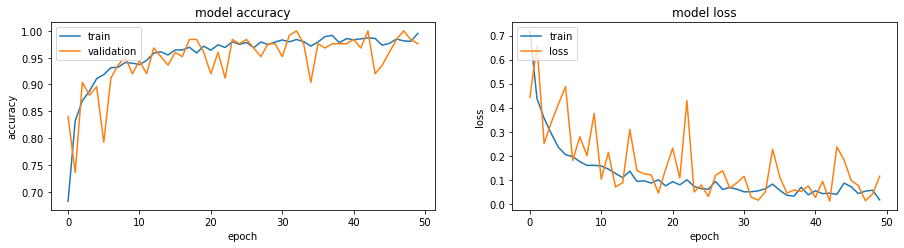

In [19]:


historyFordense121=model.fit_generator(TrainGenerator,
                                         epochs =50,
                                         steps_per_epoch =Xtrain.shape[0]/BatchSize,
                                         validation_data =(Xval,  Yval),
                                         verbose=1 ,callbacks=[annealer, checkpoint])


print("- the Accuracy and Loss for historyFordense121 Model With 20 Epochs")
plt.figure(figsize=(40,20))
# summarize history for accuracy
plt.subplot(5,5,1)
plt.plot(historyFordense121.history['accuracy'])
plt.plot(historyFordense121.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')



# summarize history for loss
plt.subplot(5,5,2)
plt.plot(historyFordense121.history['loss'])
plt.plot(historyFordense121.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','loss'], loc='upper left')
plt.show()

In [22]:
modepp=load_model("./model121_3.h5")
modepp.evaluate(Xval,  Yval)

4/4 [==============================] - 0s 54ms/step - loss: 0.0103 - accuracy: 1.0000


[0.010310817509889603, 1.0]

In [23]:
model.evaluate(TrainGenerator)

118/118 [==============================] - 25s 215ms/step - loss: 0.0212 - accuracy: 0.9936


[0.0212030541151762, 0.9936332702636719]

In [24]:
model.evaluate(Xval,  Yval)

4/4 [==============================] - 0s 57ms/step - loss: 0.1146 - accuracy: 0.9760


[0.11458714306354523, 0.9760000109672546]

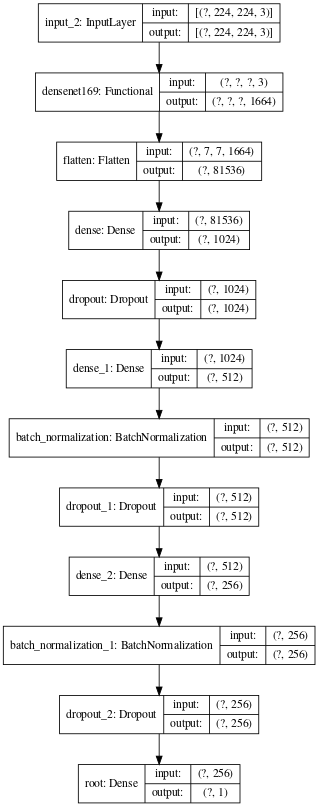

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(modepp, 
           show_shapes = True, 
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 60)

In [ ]:
# #to download output files 
# import os
# os.chdir(r'../working')
# from IPython.display import FileLink
# FileLink(r'./model121_2.h5')

In [29]:
#predict
pred=model.predict(Xval)

print(pred)


[[8.3050936e-06]
 [1.1137254e-05]
 [9.9872476e-01]
 [9.9999797e-01]
 [2.2645168e-05]
 [9.9999869e-01]
 [8.4720950e-06]
 [9.9999213e-01]
 [9.9993730e-01]
 [5.5080431e-04]
 [3.6863976e-03]
 [3.1538133e-05]
 [1.0000000e+00]
 [9.9931479e-01]
 [5.1433826e-04]
 [8.2159577e-06]
 [5.5618722e-05]
 [1.7329678e-05]
 [9.9995053e-01]
 [9.9893850e-01]
 [9.9991226e-01]
 [9.9996233e-01]
 [9.9997520e-01]
 [9.9991310e-01]
 [9.9999869e-01]
 [1.7197889e-04]
 [9.9954396e-01]
 [9.9989498e-01]
 [3.6185194e-04]
 [4.8816150e-05]
 [1.2334359e-03]
 [1.7085832e-02]
 [2.2932691e-04]
 [9.9983478e-01]
 [9.9999678e-01]
 [1.0184617e-02]
 [3.2187087e-05]
 [9.9999964e-01]
 [4.6258661e-04]
 [9.9998140e-01]
 [9.9946421e-01]
 [9.9999774e-01]
 [2.1650809e-05]
 [9.9999809e-01]
 [9.8642898e-01]
 [9.7802162e-01]
 [9.9999809e-01]
 [3.9007377e-06]
 [9.9999917e-01]
 [9.9999750e-01]
 [9.9762040e-01]
 [9.9999917e-01]
 [1.0000000e+00]
 [9.9999607e-01]
 [4.1502237e-05]
 [1.7329461e-04]
 [9.9903286e-01]
 [1.0257659e-04]
 [6.8356283e-0

In [30]:
#preprocess predications
# i will chosse 0.7 as a threshold to evaluate the preformace of diagnosis
threshold=0.7
pred=pred>threshold

[[56  0]
 [ 3 66]]


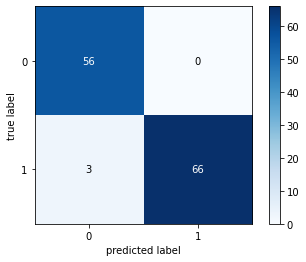

Classification Report for DenesNet 169 Model is : 
               precision    recall  f1-score   support

       False       0.95      1.00      0.97        56
        True       1.00      0.96      0.98        69

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125



In [31]:

#confusion matrix  for VGG 16 Model
from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,Yval)
print(cm)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True)
plt.show()
#Classification Report  for VGG 16 Model
from sklearn.metrics import classification_report
ClassificationReport = classification_report(pred,Yval)
print('Classification Report for DenesNet 169 Model is : \n', ClassificationReport )